In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
path = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0_pos.csv'
df = pd.read_csv(path)

In [40]:
df.head()

,agent0_grad_norms,agent0_avg_rets,agent0_avg_lens,agent0_loss
0,"[3.6465539932250977, 0.9225412607192993, 8.493...",24.704433,24.704433,23.574938
1,"[4.445135593414307, 1.1626895666122437, 10.178...",26.812834,26.812834,27.739611
2,"[4.303347587585449, 1.1983530521392822, 9.4300...",25.671795,25.671795,24.974813
3,"[5.033361434936523, 1.49270761013031, 10.51794...",27.053763,27.053763,28.995085
4,"[4.924530029296875, 1.6881932020187378, 9.8040...",25.927461,25.927461,27.475410


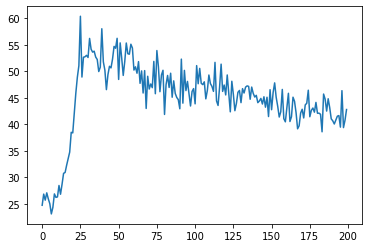

In [41]:
plt.plot(df['agent0_avg_rets'])

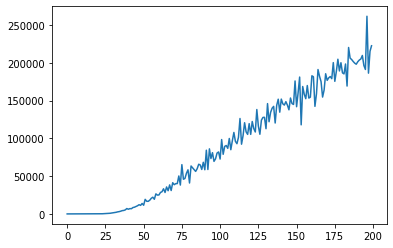

In [42]:
plt.plot(df['agent0_loss'])

In [46]:
path2 = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0_neg.csv'
df2 = pd.read_csv(path2)

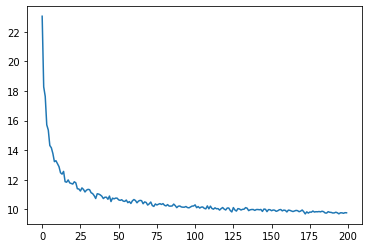

In [48]:
plt.plot(df2['agent0_avg_rets'])

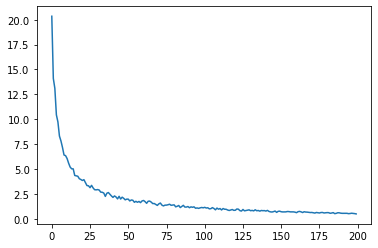

In [49]:
plt.plot(df2['agent0_loss'])

In [60]:
path3 = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0.csv'
df3 = pd.read_csv(path3)

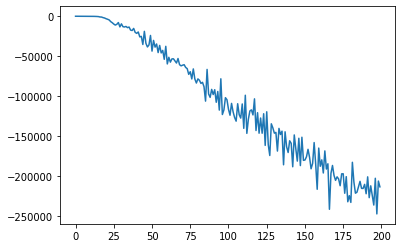

In [61]:
plt.plot(df3['agent0_loss'])

<AxesSubplot:>

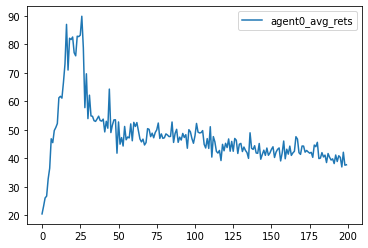

In [62]:
df3.plot(y='agent0_avg_rets')

In [5]:
path4 = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole2p_simplepg-0.csv'
df4 = pd.read_csv(path4)

In [6]:
df4.head()

,agent0_grad_norms,agent0_avg_rets,agent0_avg_lens,agent0_loss,agent1_grad_norms,agent1_avg_rets,agent1_avg_lens,agent1_loss
0,"[1.6094311475753784, 0.13623715937137604, 3.86...",14.508671,14.508671,-10.465309,"[1.4551095962524414, 0.22483980655670166, 5.15...",14.508671,14.508671,-10.210390
1,"[1.75161874294281, 0.13319021463394165, 4.2136...",14.501449,14.501449,-10.884060,"[1.5859917402267456, 0.21414335072040558, 5.64...",14.501449,14.501449,-10.774025
2,"[1.9867138862609863, 0.15986260771751404, 4.76...",16.099678,16.099678,-12.583705,"[1.8011168241500854, 0.25368091464042664, 6.45...",16.099678,16.099678,-12.603833


<AxesSubplot:>

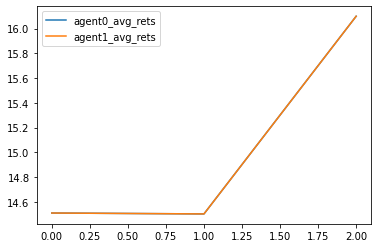

In [7]:
df4.plot(y=['agent0_avg_rets', 'agent1_avg_rets'])

<AxesSubplot:>

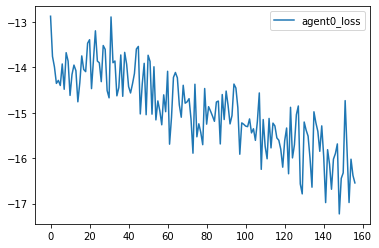

In [92]:
df4.plot(y='agent0_loss')